In [1]:
%cd '/content/drive/MyDrive/Final_Sem_Project'

/content/drive/MyDrive/Final_Sem_Project


In [2]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from Utils.utils import printLosses, generatePredictionPlot

In [3]:
def seed_everything(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
seed_everything()

In [4]:
data = pd.read_csv("data.csv")

In [5]:
data = shuffle(data)

In [6]:
data.columns = ['height', 'radius', 'freq', 'S11']

In [7]:
Y = data['S11']
X = data.drop('S11', axis = 1)

In [8]:
print(X.shape)
print(Y.shape)

(48400, 3)
(48400,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42, shuffle = True)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36300, 3)
(36300,)
(12100, 3)
(12100,)


In [11]:
rf = RandomForestRegressor(n_estimators = 700)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=700)

In [12]:
y_pred = rf.predict(X_test)

In [13]:
y_pred

array([-11.15965519,  -5.7937356 ,  -1.87410365, ...,  -5.73317436,
        -3.07811573,  -3.49102517])

In [14]:
printLosses(y_pred, y_test)

R2 Score on test set is :  0.9621803794850983
Mean Squared Error on test set is :  0.7348042479992605
Mean Absolute Error on test set is :  0.27439939884179054
Root Mean Squared Error on test set is :  0.8572072374865138
Mean Absolute Percentage Error on test set is :  0.06969751665402989
Root Mean Squared Percentage Error on test set is :  2.4653999574099816


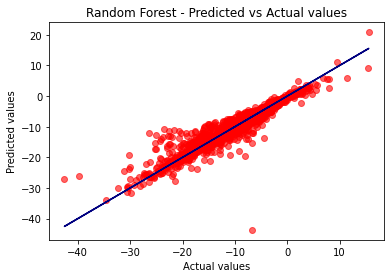

In [15]:
generatePredictionPlot(y_pred, y_test, "Random Forest")